# Vizualizando e tratando o mapa da Índia

## Importando as bibliotecas

In [42]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})
print('Todas as bibliotecas foram importadas com sucesso')

Todas as bibliotecas foram importadas com sucesso


## Preparando o ambiente

In [43]:
PRINCIPAL_PATH = './data/'
SEED = 101
np.random.seed(SEED)

## Importando a base de dados

In [44]:
days = pd.read_csv(PRINCIPAL_PATH + 'covid_india/covid_india_by_days.csv')
days['Date'] = pd.to_datetime(days['Date'])
days.head()

,Date,Territory,Cured,Deaths,Confirmed
0,2020-03-14,Delhi,1,1,1
1,2020-03-25,Maharashtra,1,1,39
2,2020-03-27,Maharashtra,14,1,6
3,2020-03-28,Maharashtra,10,1,50
4,2020-03-29,Kerala,4,1,6


In [45]:
india_map = gpd.read_file(PRINCIPAL_PATH + 'raw_map_india/india_administrative_state_boundary.shp')
india_map.head()

,gid,st_nm,tid,territory_,geometry
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


## Tratando o mapa da Índia

In [46]:
india_map['tid'].drop_duplicates()

0    None
Name: tid, dtype: object

In [47]:
india_map['territory_'].drop_duplicates()

0    None
Name: territory_, dtype: object

In [48]:
india_map.drop(columns = ['tid', 'territory_', 'gid'], inplace = True)
india_map.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [49]:
india_map.rename(columns = {'st_nm': 'Territory'}, inplace = True)
india_map.head()

,Territory,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


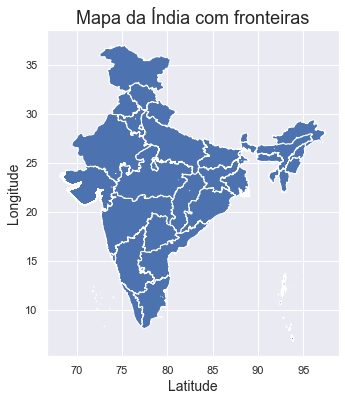

In [50]:
ax = india_map.plot()
ax.set_title('Mapa da Índia com fronteiras', fontsize = 18, loc = 'center')
ax.set_xlabel('Latitude', fontsize = 14)
ax.set_ylabel('Longitude', fontsize = 14)
ax = ax

## Salvando as alterações feitas no mapa

In [51]:
india_map.to_file(PRINCIPAL_PATH + 'new_map_india/india_administrative_state_boundary.shp')
print('Salvo com sucesso!')

Salvo com sucesso!


In [52]:
india_map = gpd.read_file(PRINCIPAL_PATH + 'new_map_india/india_administrative_state_boundary.shp')
india_map.head()

,Territory,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


## Juntando os dados geométricos com os dados da COVID-19

Primeiro de tudo precisamos vizualizar as diferenças que aparecem entre os nomes dos territórios em cada base de dados

In [53]:
dataset_territories = days['Territory'].drop_duplicates()
dataset_territories.size

37

In [54]:
map_territories = india_map['Territory'].drop_duplicates()
map_territories.size

36

In [55]:
territories_without_correspondent = []

for territory in dataset_territories:
    if territory not in list(map_territories):
        territories_without_correspondent.append(territory)
    
territories_without_correspondent

['Delhi',
 'Telengana',
 'Jammu and Kashmir',
 'Ladakh',
 'Arunachal Pradesh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Andaman and Nicobar Islands']

In [56]:
territories_without_correspondent_df = pd.DataFrame({
    'Territory': territories_without_correspondent,
    'Correspondent': [None for _ in range(len(territories_without_correspondent))]
})


territories_without_correspondent_df.index = territories_without_correspondent_df['Territory']
territories_without_correspondent_df.drop(columns = ['Territory'], inplace = True)
territories_without_correspondent_df

,Correspondent
Territory,
Delhi,None
Telengana,None
Jammu and Kashmir,None
Ladakh,None
Arunachal Pradesh,None
Dadra and Nagar Haveli and Daman and Diu,None
Andaman and Nicobar Islands,None


In [57]:
possible_correspondents = pd.DataFrame({
    'PossibleCorrespondents': map_territories.sort_values()
})

possible_correspondents.reset_index(drop = True, inplace = True)
possible_correspondents

,PossibleCorrespondents
0,Andaman & Nicobar Island
1,Andhra Pradesh
2,Arunanchal Pradesh
3,Assam
4,Bihar
5,Chandigarh
6,Chhattisgarh
7,Dadara & Nagar Havelli
8,Daman & Diu
9,Goa


In [58]:
territories_without_correspondent_df.loc['Delhi']['Correspondent'] = 'NCT of Delhi'
territories_without_correspondent_df.loc['Telengana']['Correspondent'] = 'Telangana'
territories_without_correspondent_df.loc['Jammu and Kashmir']['Correspondent'] = 'Jammu & Kashmir'
territories_without_correspondent_df.loc['Ladakh']['Correspondent'] = None
territories_without_correspondent_df.loc['Arunachal Pradesh']['Correspondent'] = 'Arunanchal Pradesh'
territories_without_correspondent_df.loc['Dadra and Nagar Haveli and Daman and Diu']['Correspondent'] = 'Dadara & Nagar Havelli'
territories_without_correspondent_df.loc['Andaman and Nicobar Islands']['Correspondent'] = 'Andaman & Nicobar Island'

territories_without_correspondent_df

,Correspondent
Territory,
Delhi,NCT of Delhi
Telengana,Telangana
Jammu and Kashmir,Jammu & Kashmir
Ladakh,None
Arunachal Pradesh,Arunanchal Pradesh
Dadra and Nagar Haveli and Daman and Diu,Dadara & Nagar Havelli
Andaman and Nicobar Islands,Andaman & Nicobar Island


In [59]:
days = days.query('Territory != "Ladakh"') 
(days['Territory'] == 'Ladakh').sum()

0

In [60]:
rename_territories_names = {}

for territory in days['Territory'].drop_duplicates():
    rename_territories_names[territory] = territory

for index, row in territories_without_correspondent_df.iterrows():
    rename_territories_names[index] = row['Correspondent']
    
pd.DataFrame([rename_territories_names]).T.rename(columns = {0: 'Correspondent'}).head()

,Correspondent
Delhi,NCT of Delhi
Maharashtra,Maharashtra
Kerala,Kerala
Karnataka,Karnataka
Gujarat,Gujarat


In [61]:
days['Territory'] = days['Territory'].map(rename_territories_names)
days.head()

,Date,Territory,Cured,Deaths,Confirmed
0,2020-03-14,NCT of Delhi,1,1,1
1,2020-03-25,Maharashtra,1,1,39
2,2020-03-27,Maharashtra,14,1,6
3,2020-03-28,Maharashtra,10,1,50
4,2020-03-29,Kerala,4,1,6


In [62]:
territories_without_correspondent = []

for territory in days['Territory'].drop_duplicates():
    if territory not in list(map_territories):
        territories_without_correspondent.append(territory)
    
len(territories_without_correspondent)

0

In [63]:
days_geometries = days.merge(
    india_map,
    on = 'Territory',
    how = 'left'
)

days_geometries.Territory.drop_duplicates()

0                   NCT of Delhi
1                    Maharashtra
4                         Kerala
5                      Karnataka
6                        Gujarat
9                    West Bengal
17                       Haryana
20                 Uttar Pradesh
21                    Tamil Nadu
22                        Punjab
26                Andhra Pradesh
40                     Telangana
52                Madhya Pradesh
76                     Rajasthan
85               Jammu & Kashmir
183                        Bihar
211                   Chandigarh
235                       Odisha
301                   Puducherry
427                    Jharkhand
434                  Uttarakhand
449             Himachal Pradesh
510                 Chhattisgarh
702                        Assam
900                          Goa
1153          Arunanchal Pradesh
1197                   Meghalaya
1241                     Tripura
1284      Dadara & Nagar Havelli
1541                    Nagaland
1614      

In [64]:
days_geometries.isna().sum()

Date         0
Territory    0
Cured        0
Deaths       0
Confirmed    0
geometry     0
dtype: int64

In [65]:
days_geometries.head()

,Date,Territory,Cured,Deaths,Confirmed,geometry
0,2020-03-14,NCT of Delhi,1,1,1,"POLYGON ((77.09361 28.86940, 77.10973 28.86722..."
1,2020-03-25,Maharashtra,1,1,39,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
2,2020-03-27,Maharashtra,14,1,6,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
3,2020-03-28,Maharashtra,10,1,50,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
4,2020-03-29,Kerala,4,1,6,"POLYGON ((74.99575 12.79227, 75.00006 12.78777..."


In [66]:
days_geometries.rename(columns = {'geometry': 'TerritoryGeometry'}, inplace = True)
days_geometries.head()

,Date,Territory,Cured,Deaths,Confirmed,TerritoryGeometry
0,2020-03-14,NCT of Delhi,1,1,1,"POLYGON ((77.09361 28.86940, 77.10973 28.86722..."
1,2020-03-25,Maharashtra,1,1,39,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
2,2020-03-27,Maharashtra,14,1,6,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
3,2020-03-28,Maharashtra,10,1,50,"MULTIPOLYGON (((73.46270 16.03710, 73.46178 16..."
4,2020-03-29,Kerala,4,1,6,"POLYGON ((74.99575 12.79227, 75.00006 12.78777..."


Salvando os dados agora com o nome dos Territórios alterados

In [67]:
to_save_days = days_geometries.copy()
to_save_days['Date'] = to_save_days['Date'].astype(str)
to_save_days.drop(columns = ['TerritoryGeometry'], inplace = True)
to_save_days.to_csv(PRINCIPAL_PATH + 'covid_india/renamed_territories.csv', index = False)

## Gerando pontos aleatórios que representarão a contaminação

In [68]:
india_territories = india_map.copy()
india_territories.index = india_map['Territory']
india_territories.drop(columns = 'Territory', inplace = True)
india_territories = india_territories['geometry']
india_territories.head()

Territory
Andaman & Nicobar Island    MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
Arunanchal Pradesh          POLYGON ((96.16261 29.38078, 96.16860 29.37432...
Assam                       MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
Bihar                       MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
Chandigarh                  POLYGON ((76.84147 30.75996, 76.83599 30.73623...
Name: geometry, dtype: geometry

In [69]:
territories = days_geometries.groupby(['Territory', 'Date']).sum()

geometry = [india_territories.loc[index[0]] for index, _ in territories.iterrows()]
territories['geometry'] = geometry
territories.head()

Cured  Deaths  Confirmed  \
Territory                Date                                   
Andaman & Nicobar Island 2020-07-28     10       1         14   
                         2020-07-30      5       1         65   
                         2020-08-01     13       1         77   
                         2020-08-02     12       2         88   
                         2020-08-03     16       1         98   

                                                                              geometry  
Territory                Date                                                           
Andaman & Nicobar Island 2020-07-28  (POLYGON ((93.71975948121514 7.207067636262479...  
                         2020-07-30  (POLYGON ((93.71975948121514 7.207067636262479...  
                         2020-08-01  (POLYGON ((93.71975948121514 7.207067636262479...  
                         2020-08-02  (POLYGON ((93.71975948121514 7.207067636262479...  
                         2020-08-03  (POLYGON ((93.71975948121514 7.207067636262479...

In [70]:
from shapely.geometry import Point

def random_point_in_territory(shp):
    within = False
    while not within:
        x = np.random.uniform(shp.bounds[0], shp.bounds[2])
        y = np.random.uniform(shp.bounds[1], shp.bounds[3])
        within = shp.contains(Point(x, y))
    return Point(x,y)

<h1 style="color: red;">ATENÇÃO!</h1>
<h2>As linhas de código a seguir estão comentadas porque demoram muito para serem executadas, não se preocupe pois o resultado delas é importado logo depois</h2>

In [ ]:
# from tqdm import tqdm

# points_covid_animation = {
#     'Cured': [], 'Deaths': [], 'Confirmed': []
# }

# def reset_quantity_variables():
#     return {
#         'Cured': 0, 'Deaths': 0, 'Confirmed': 0
#     }

# quantity_variables = reset_quantity_variables()

# current_territory = territories.index[0][0]


# for index, row in tqdm(territories.iterrows()):
#     territory = index[0]
#     if territory != current_territory:
#         quantity_variables = reset_quantity_variables()
#     current_territory = territory
#     date = index[1]
#     for var in quantity_variables.keys():
#         value = quantity_variables[var]
#         if value > 100:
#             quantity_variables[var] = 0
#             points_covid_animation[var].append({
#                 'Territory': territory,
#                 'Date': date,
#                 'geometry': random_point_in_territory(row['geometry'])
#             })
#         quantity_variables[var] += row[var]
        
    
# points_covid_animation

## Salvando os pontos gerados

In [ ]:
# for k in points_covid_animation.keys():
#     points_covid_animation[k] = gpd.GeoDataFrame(points_covid_animation[k])
    
# points_covid_animation['Cured'].head()

In [ ]:
# for k in points_covid_animation.keys():
#     points_covid_animation[k].to_file(PRINCIPAL_PATH + 'animations_contamination/' + k + '.shp')
#     print(f'Arquivo {k}.shp salvo com sucesso!')

In [ ]:
quantity_variables = ['Cured', 'Deaths', 'Confirmed']

points_covid_animation = {}

for var in quantity_variables:
     points_covid_animation[var] = gpd.read_file(
         PRINCIPAL_PATH + 'animations_contamination/' + var + '.shp'
     )
        
points_covid_animation